# Basic Linear Analysis of 3d Bodies

In [1]:
from polymesh.examples import stand_vtk
pd = stand_vtk(read=True)

In [2]:
pd.bounds()

[(-55.0000300703703, 55.00000276009874),
 (-54.99977258849584, 54.99933390491028),
 (-9.999513163313555, 109.99947238490671)]

In [3]:
import pyvista as pv
import numpy as np

from dewloosh.core.downloads import download_stand
from polymesh import PolyData, CartesianFrame, PointData
from polymesh.cells import TET4 as CellData
from polymesh.tri.triutils import edges_tri
from polymesh.topo import unique_topo_data, detach

vtkpath = download_stand()
pd = PolyData.read(vtkpath)
coords = pd.coords() / 1000
topo = pd.topology()[:, :4]
coords, topo = detach(coords, topo)

# pick up data from file or generate random data
random_data = np.random.rand(coords.shape[0], 3) * 10

# the ambient coordinate frame
GlobalFrame = CartesianFrame(dim=3)

# pointdata and celldata
pd = PointData(coords=coords, frame=GlobalFrame)
cd = CellData(topo=topo, frames=GlobalFrame)

mesh = PolyData(pd, cd, frame=GlobalFrame)

Plot the model, coloured with vertical displacements:

In [4]:
import pyvista as pv
pl = pv.Plotter()
pl = mesh.plot(plotter=pl)
pl.show(jupyter_backend=None)  


Save the results:. It is important on WIndows, that when the renderer window pops up and you are ready with the scene, you must exit by pressing 'q', instead of closing the window by clicking on the gui.

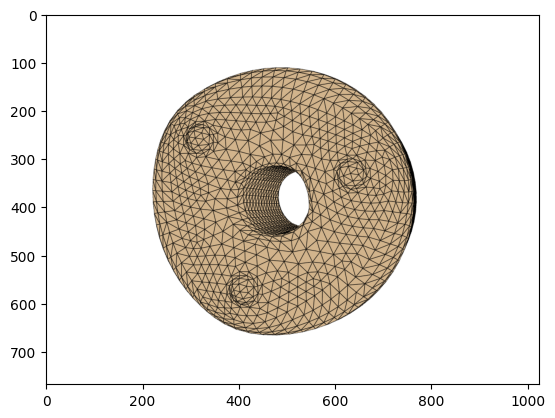

In [5]:
import matplotlib.pyplot as plt
img = mesh.plot(return_img=True)
plt.imshow(img) 

In [6]:
import json
import numpy as np

np.save('coords', coords)
np.save('topo', topo)
np.save('random_data', random_data)

data = {   
    'mesh' : {
        'coordinates' : 'coords',
        'data' : {'random' : 'random_data',},
        'layout' : {
            'stand' : {
                'topology' : 'topo',
                'class' : 'TET4',
                }
        }
    },
}

json.dumps(data, indent=4)

'{\n    "mesh": {\n        "coordinates": "coords",\n        "data": {\n            "random": "random_data"\n        },\n        "layout": {\n            "stand": {\n                "topology": "topo",\n                "class": "TET4"\n            }\n        }\n    }\n}'

In [7]:
with open("stand.json", "w") as outfile:
    json.dump(data, outfile)